**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 02:** Descida do Gradiente

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula02_descida_do_gradiente.ipynb)

# Objetivo da Aula

Queremos criar um **oráculo** e já temos alguma ideia de como fazer isso usando uma **regressão linear**. Entretanto, o tempo para conseguir otimizar o oráculo ainda é proibitivo. Aprenderemos agora uma maneira bem mais eficiente de se fazer esse processo. O que aprenderemos nessa aula deve ser entendido nos mínimos detalhes por você, dado ser muito importante para as próximas aulas.

# Rise over Run

Vamos agora rever os nossos conhecimentos de Cáculo I para ter uma intuição de derivada de uma função. 

Antes de partir diretamente para as definições, vamos falar sobre uma medida que chamaremos de **rise over run**. Essa medida, para uma dada função $f$ e dois pontos $x_1$ e $x_2$ no domínio de $f$, retorna a variação no eixo Y (**rise**) dividida pela variação no eixo X (**run**). Veja uma implementação a seguir.

In [1]:
rise_over_run = lambda f, x1, x2 : (f(x2) - f(x1))/ (x2 - x1)

Acima, usamos a notação *lambda* do Python, usada também para criar funções. Por exemplo, a linha acima poderia ser reescrita com:

In [2]:
def rise_over_run(f, x1, x2) :
    return (f(x2) - f(x1))/ (x2 - x1)

Vamos usar esta definição em alguma função do segundo grau. A figura a seguir ilustra o que queremos dizer.

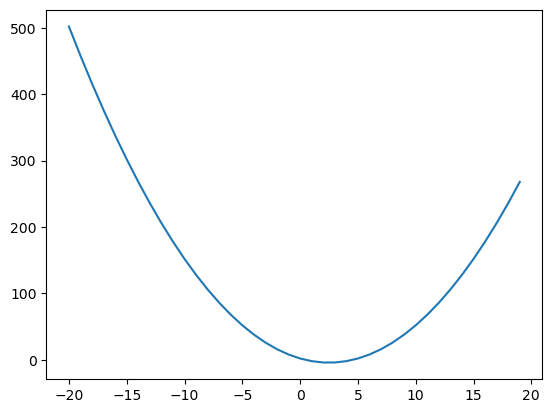

In [3]:
import matplotlib.pyplot as plt

## Função do segundo grau
f = lambda x : x**2-5*x+2

## Eixos X e Y
X = range(-20,20)
Y = [f(x) for x in X]

## Plot
plt.plot(X, Y)

Como dissemos, dados dois pontos nessa função do segundo grau, a relação que chamaremos de **rise over run** se refere à variação em $y$ dividida pela variação em $x$. Por exemplo, vamos escolher os pontos com $x = 10$ e $x = 15$.

In [4]:
rise_over_run(f, 10, 15)

20.0

Vamos agora plotar a reta que representa o **rise over run**.

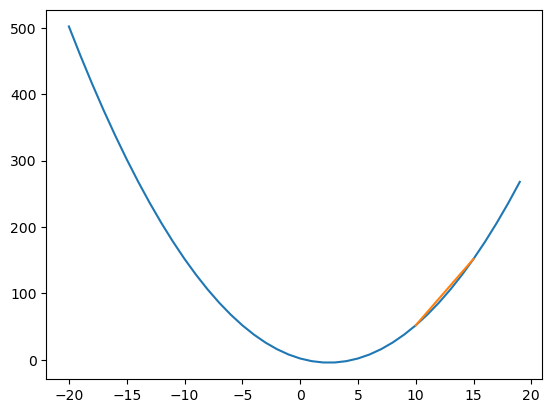

In [5]:
plt.plot(X, Y)
plt.plot( (10, 15), (f(10), f(15)))

Note que o **rise over run** é positivo porque o valor da função $f$ aumentou quando nos movemos de f(10) para f(15). O valor 20.0 do **rise over run** nos diz que este aumento em Y foi 20 vezes superior à distância percorrida em X, o que nos informa, então, a declividade da curva neste intervalo. 

Se o valor em Y decrescer ao aumentarmos o valor em X, então o rise over run é negativo. Vamos nos mover do ponto em que $x = -5$ para o ponto em que $x = 5$, por exemplo:

In [6]:
rise_over_run(f, -5, 5)

-5.0

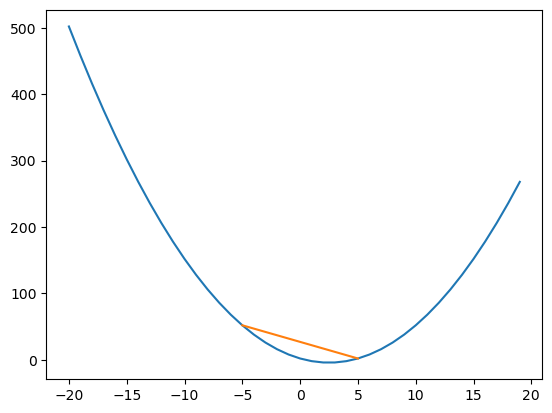

In [7]:
plt.plot(X, Y)
plt.plot( (-5, 5), (f(-5), f(5)))

Note que o **rise over run** é negativo porque o valor da função $f$ diminuiu quando nos movemos de f(-5) para f(5). O valor -5.0 do **rise over run** nos diz que este decréscimo em Y foi 5 vezes superior à distância percorrida em X, o que nos informa, então, a declividade da curva neste intervalo. 

Vamos tentar agora dois pontos um pouco mais separados, os pontos com $x = -10$ e $x = 15$.

In [8]:
rise_over_run(f, -10, 15)

0.0

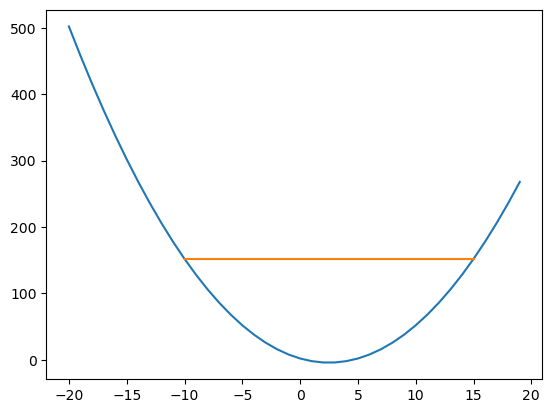

In [9]:
plt.plot(X, Y)
plt.plot( (-10, 15), (f(-10), f(15)))

Podemos notar que neste intervalo a função $f$ não aumentou, dado que $f(-10) = f(15)$. No gráfico, a **rise over run** é uma linha perfeitamente horizontal.

**Moral da História**

  1. Quando a função aumenta nos intervalos considerados (aumentando em X), então valor de **rise over run** é positivo e a reta que ele representa é ascendente. 
  
  2. Quando a função diminui nos intervalos considerados (aumentando em X), então valor de **rise over run** é negativo e a reta que ele representa é descendente. 
  
  3. Quando a função nem aumenta e nem diminui nos intervalos considerados (aumentando em X), então valor de **rise over run** é 0 e a reta que ele representa é horizontal. 

# Derivada

A noção de **derivada** é muito similar à noção de **rise over run**. Entretanto, quando tratamos de derivada estamos nos referindo a uma situação em que o **run**, ou seja, o aumento em $X$, é quase que imperceptível. Nesse caso, os pontos $x_1$ e $x_2$ mencionados na **rise over run** estão muito próximos um dos outros.

Para manter a nossa notação próxima a dos livros didáticos de Cáculo 1, vamos chamar $x_1$ de $a$ e $x_2$ de $a + h$. A distância entre $x_1$ e $x_2$, dessa forma, é $h$. Dessa forma, a equação para obtermos a derivada em um ponto é dada a seguir:

$$f'(a) = lim_{h \rightarrow 0} \frac{f(a+h) - f(a)}{h}$$

Este conceito parece um pouco anti-intuitivo, dado que não estamos falando que $h = 0$, já que dividir alguma coisa por 0 não é algo bem definido. Por outro lado, estamos falando que iremos dividir por um $h$ tão pequeno quanto pudermos, algo que tende a $0$. 

Esse conceito de próximo a zero é justamente o que define a diferenciação. Uma definição mais robusta do que este conceito implica exigiria muito mais exemplos, definições e jupyter notebooks. Como esta não é a nossa intenção, ficaremos satisfeito com esta interpretação de que **a derivada é simplesmente uma *rise over run* com um intervalo no eixo X muito pequeno**. 

Neste caso, como os dois pontos estão muito próximos na derivada, podemos imaginar que a derivada representa uma reta que tangencia a função naquele ponto em questão. Todas as propriedades desta reta tangente são similaridades ao que vimos anteriormente para a reta induzida pelo **rise over run**  entre dois pontos $x_1$ e $x_2$ quaisquer.

  1. Quando a função é crescente no ponto $a$, então valor da **derivada** é positivo e a reta tangente que ela representa é ascendente. 
  
  2. Quando a função é descrescente no ponto $a$, então valor da **derivada** é negativo e a reta tangente que ela representa é descendente. 
  
  3. Quando a função não está nem crescendo e nem decrescendo no ponto $a$, então valor da **derivada** é 0 e a reta tangente que ela representa é horizontal. 

A função a seguir define a nossa ideia de derivada.

In [10]:
derivada = lambda f, a : rise_over_run(f, a, a+0.0001)

Note que escolhemos de maneira arbitrária um $h = 0.0001$, isso simplifica a nossa noção do que é muito próximo de 0. Podemos definir agora a derivada de $f$ em qualquer ponto que imaginarmos. Vamos computar essa derivada para os pontos com a coordenada em X entre -5 e 5, variando em passos de 0.25:

In [11]:
for i in range(-20, 20) :
    print(f"Derivada em {i/4}: {derivada(f, i/4)}")    

Derivada em -5.0: -14.999900000027253
Derivada em -4.75: -14.49990000000949
Derivada em -4.5: -13.999899999991726
Derivada em -4.25: -13.499899999973962
Derivada em -4.0: -12.999900000040576
Derivada em -3.75: -12.499900000025033
Derivada em -3.5: -11.99990000000949
Derivada em -3.25: -11.499899999993946
Derivada em -3.0: -10.999899999978403
Derivada em -2.75: -10.499899999998387
Derivada em -2.5: -9.999899999982844
Derivada em -2.25: -9.499900000002828
Derivada em -2.0: -8.999900000007269
Derivada em -1.75: -8.49990000000838
Derivada em -1.5: -7.999899999991726
Derivada em -1.25: -7.499899999992836
Derivada em -1.0: -6.999899999993946
Derivada em -0.75: -6.499899999995057
Derivada em -0.5: -5.999899999996167
Derivada em -0.25: -5.499899999997277
Derivada em 0.0: -4.999900000000057
Derivada em 0.25: -4.4998999999994975
Derivada em 0.5: -3.999899999996167
Derivada em 0.75: -3.499899999997277
Derivada em 1.0: -2.999900000002828
Derivada em 1.25: -2.4998999999950566
Derivada em 1.5: -1.99

O que podemos ver acima é que ao variar entre -5 e 5 no eixo X, encontramos no início derivadas negativas, isso ocorre porque o **rise over run** produz uma declividade descendente, como visto anteriormente. Depois de um certo ponto, que chamaremos de **ponto mínimo local**, a derivada passou a ser positiva, ou seja, o **rise over run** produz declividade ascendente. 

# Mínimos Locais

Em funções contínuas, quando temos uma situação em que de um lado as derivadas são negativas e do outro lado as derivadas eram positivas, temos um mínimo local em algum lugar deste intervalo. Neste mínimo local a derivada é zero. Imagine que isso é similar a jogar uma bola para o alto, de uma lado a aceleração da bola é negativa e do outro lado a acelaração é positiva. No ponto mais alto da trajetória da bola, a aceleração é zero.

Supondo que estamos no ponto $x = a$ de uma função $f$. Para encontrar um mínimo local próximo de $a$,  devemos seguir a estratégia:

1. Se a derivada em $a$ é positiva, então devemos dar um passinho para a esquerda.

2. Se a derivada em $a$ é negativa, então devemos dar um passinho para a direita.

# Regressão Linear

Iniciamos na aula anterior um exemplo com dados do *geyser* chamado de *old faithful*.

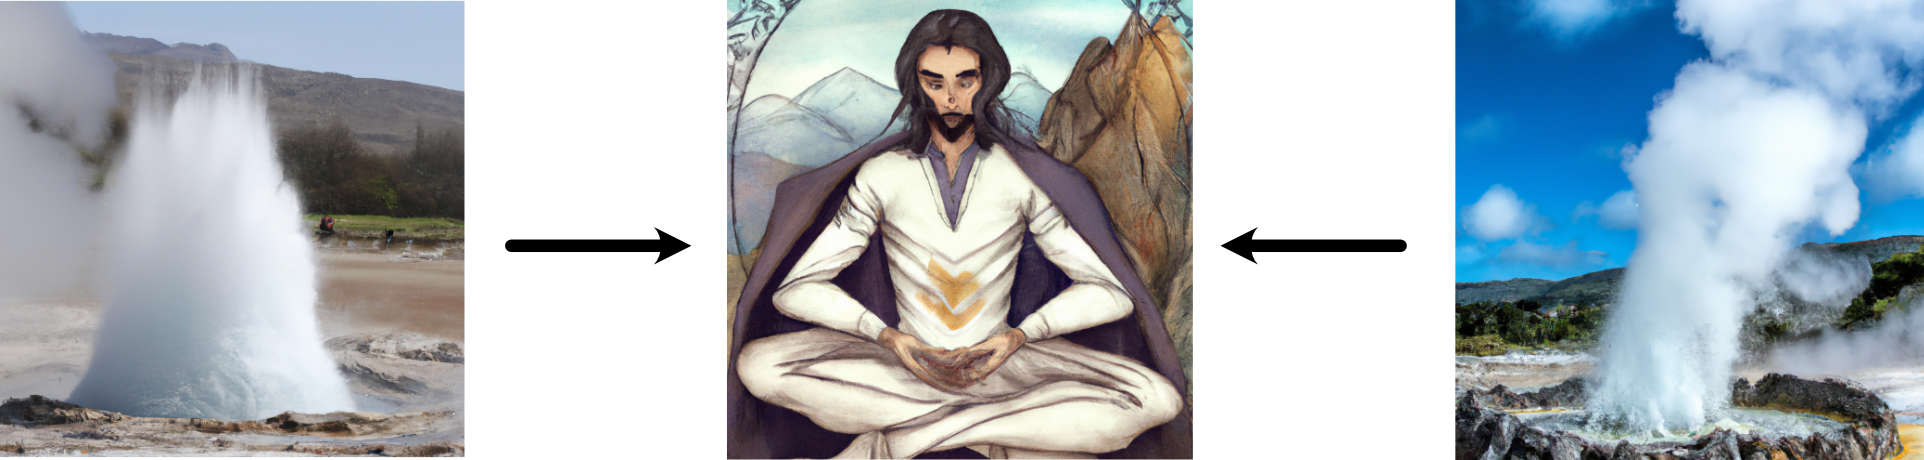

In [12]:
## Para fazer a leitura dos dados
import pandas as pd

In [13]:
###############################################
# Banco de Dados: Old Faithful
#
# Descrição
# Tempo de espera entre as erupções e a duração 
# da erupção do gêiser Old Faithful no Parque 
# Nacional de Yellowstone, Wyoming, EUA.
# 
# Formato
# Um DataFrame com 272 observações em 2 variáveis.
# 
# [,1]	eruptions	numeric	 Tempo de Erupção em minutos
# [,2]	waiting	numeric	 Tempo de espera para a 
#                        próxima erupção (em minutos)
###############################################

faithful = pd.read_csv("data/faithful.csv", index_col = 0)
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


Também vimos na aula anterior um **gráfico de pontos**. 

<Axes: xlabel='waiting', ylabel='eruptions'>

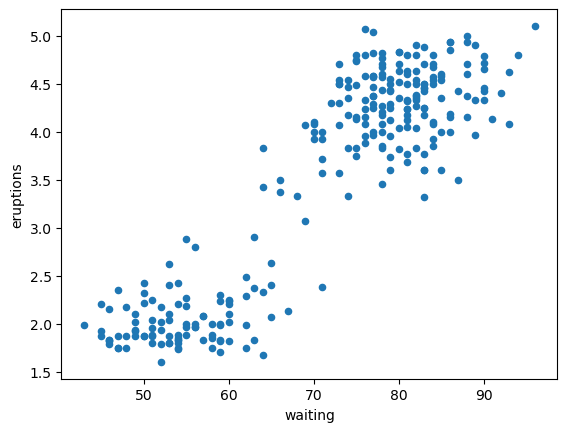

In [14]:
faithful.plot.scatter(x='waiting',
                      y='eruptions')

Relembrando o que tratamos na aula passada:

1. O eixo X corresponde aos valores que passaremos para um oráculo para que ele possa nos fornecer uma resposta. A esse conjunto de dados (eixo X) chamaremos de *features* ou *características*.

2. O eixo Y corresponde ao que queremos que o oráculo nos responda ao ser apresentado a ele um conjunto de características. A esse conjunto de dados (eixo Y) chamaremos de *target*, *label* ou *rótulos*.

O **objetivo da regressão linear** será encontrar uma curva que se adeque bem a esses dados. Por exemplo, podemos pensar que uma reta do tipo $y = ax + b$ poderia ser suficiente, dado que temos o $x$ (eruption) e o oráculo precisa responder o valor de $y$ (waiting). Entretanto, como podemos encontrar os valores de $a$ e $b$ que fazem com que o oráculo retorne boas respostas?



Também definimos na aula passada uma função que chamamos de *erro_quadratico_acumulado*, dado que o erro foi definido como a soma do quadrado das distâncias entre as respostas corretas e as respostas preditas pelo oráculo. O fato de elevarmos ao quadrado faz com que todos os valores sejam positivos.

$$erro = \sum_{(x_i,y_i)} (4 - y_i)^2$$

Entretanto, o fato de termos elevado todos os valores ao quadrado faz com que o somatório de erro seja um número muito que vai acabar dependendo do número de instâncias no banco de dados. Para evitar esse problema, é mais interessante usar o erro quadrático médio, que simplesmente computa a média dos erros parciais ao invés de simplesmente somar.

$$erro = \frac{1}{n}\sum_{(x_i,y_i)} (4 - y_i)^2,$$

onde $n$ é o números de elementos considerados no somatório.

Vamos agora criar a função *erro_quadratico_medio*

In [15]:
def erro_quadratico_medio(oraculo) :
    pontos_y = faithful.eruptions.values
    pontos_x = faithful.waiting.values

    erro  = 0
    count = 0
    for i in range(len(pontos_x)) :
        predicted = oraculo(pontos_x[i])
        erro += (predicted - pontos_y[i])**2
        count += 1
    return erro/count

In [16]:
def primeiro_oraculo(x) :
    return 0.05*x - 0.5

print(erro_quadratico_medio(primeiro_oraculo))

0.5618436580882354


Duas perguntas surgiram na aula anterior:

1.  Existe algum valor ótimo de $a$ e $b$ que geraria a melhor reta possível?
2.  É possível achar os melhores valores de $a$ e $b$?

A resposta é sim para as duas perguntas, sendo que a chave para entender como isso será feito começa entendendo a função de erro que queremos minimizar. Sabemos que o erro para algum $a$ e $b$ fixo é dado por:

$$erro = \frac{1}{n} \sum_{(x_i,y_i)} ((a \times x_i + b) - y_i)^2$$

Se fixarmos um $b$ e variarmos o valor de $a$, então podemos encontrar erros diferentes, dependendo de $a$. Por exemplo, vamos fixar um $b$ em 0 e variar o valor de $a$ em um intervalo de 0 a 5.


In [17]:
import matplotlib.pyplot as plt
def erro_quadratico_variando_a(b = 0) :
    eixo_a = []
    eixo_erro = []
    
    for i in range(100) :
        a = (i-50)/100
        
        eixo_a.append(a)
            
        oraculo = lambda x : a*x + b        
        eixo_erro.append(erro_quadratico_medio(oraculo))

    return eixo_a, eixo_erro

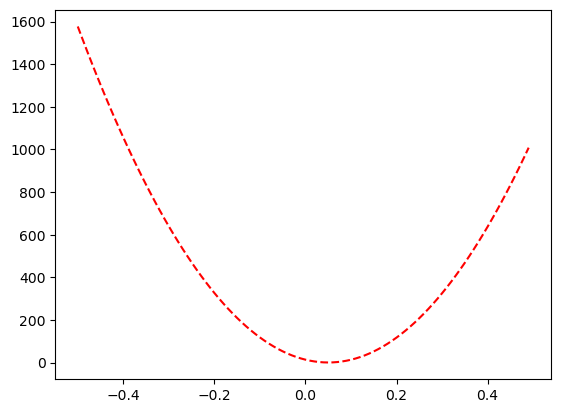

In [18]:
eixo_a, eixo_erro = erro_quadratico_variando_a()
plt.plot(eixo_a, eixo_erro, 'r--', label='Erros')

Pela figura, podemos perceber que o melhor valor de $a$, fixado $b=0$, está entre $0.0$ e $0.2$, o mesmo ponto que estimamos na aula anterior. Note que a única mudança deste gráfico gerado pelo erro quadrático medio em relação ao gráfico da última aula, gerado pelo erro quadrático acumulado, é que os valores do eixo $Y$ são muito mais baixos. Você deverá preferir o erro quadrático médio justamente por esse motivo.


Na aula passada, iniciamos uma busca pelo melhor ponto iterando sobre todos os possíveis valores e percebemos que, apesar de encontrarmos um ponto próximo ao mínimo com essa estratégia, o tempo para obter o resultado era proibitivo mesmo para exemplos simples. 

Na aula de hoje, vamos usar outros conceitos matemáticos que nos permitirão encontrar o ponto mínimo.

# Derivada da Curva de Erro

O gráfico visto anteriormente mostra que o erro que temos é uma curva do segundo grau. Se quisermos saber o quão íngreme ou inclinada essa curva está em um determinado ponto, podemos usar a derivada.

Como dito anteriormente, a derivada nos ajuda a descobrir o quão rápido a curva está mudando em um ponto específico. Por exemplo, se estivermos andando ao longo de uma montanha-russa e quisermos saber o quão rápido estamos subindo ou descendo em um determinado ponto, a derivada nos ajuda a descobrir isso.

A inclinação da derivada nos fornece um bom indicativo para sabermos para que lado estamos subindo e para que lado estamos descendo ao nos movermos a partir de um ponto, dado que a derivada nos fornece a declividade da reta que tangencia a curva em um determinado ponto.

A equação para obtermos a derivada em um ponto é dada a seguir:

$$f'(a) = lim_{h \rightarrow 0} \frac{f(a+h) - f(a)}{h}$$

Implemente esta noção de derivada em uma função assumindo que $h$ é um valor suficientemente baixo, alco como $h = 0.0001$.

In [19]:
def derivada_erro_quadratico_no_ponto_a(a, b = 0) :
    ## ToDo: Implemente esta função usando a fórmula de derivada
    oraculo = lambda x : a*x + b
    pass

Vale ressaltar que também poderíamos usar os nossos conhecimentos de Cálculo 1 para obter esta derivada. Nesse caso, o que precisamos computar seria o seguinte:

$$erro = \frac{1}{n}\sum_{(x_i,y_i)} (f(x_i) - y_i)^2$$

A derivada do erro em função de $f$ seria: 

$$\frac{\partial erro}{\partial f} = \frac{2}{n} \sum_{(x_i,y_i)} [(f(x_i) - y_i)]$$

Entretanto, como precisamos da derivada em função do coeficiente $a$, dado ser o único que varia, teríamos que usar a regra da cadeia:

$$   \frac{\partial erro}{\partial a} =    \frac{\partial erro}{\partial f}     \frac{\partial f}{\partial a},$$ 

onde $\frac{\partial f}{\partial a} = x$, dado que $f(x) = ax + b$, então derivar $f$ em função de $a$ retorna $x$., gerando:

$$\frac{\partial erro}{\partial a} =  \frac{2}{n}\sum_{(x_i,y_i)} x_i(f(x_i) - y_i)$$



Podemos agora implementar uma função que derive usando essas equações matemáticas e comparar com a nossa função anterior, que usava a própria definição.


In [20]:
## ToDo: complete esta função
def derivada_erro_quadratico_no_ponto_a_diretamente(a, b = 0) :
    y = faithful.eruptions.values
    x = faithful.waiting.values
    
    derivada = 0
    for i in range(len(x)) :
        x_i = x[i]
        y_i = y[i]
        f_x_i = a*x_i + b
        
        ## ToDo: implemente a linha abaixo
        ## derivada += ...
    
    return derivada 

In [21]:
derivada_erro_quadratico_no_ponto_a(0.3)

2604.4431492590547

In [22]:
derivada_erro_quadratico_no_ponto_a_diretamente(0.3)

2603.9220955882365

Podemos ver que as duas formas de computar a derivada gera valores muitos próximos (varie os valores para ter uma ideia melhor), o que pode gerar imprecisões. Entretanto, para nossos objetivos será suficiente.

**Intuição sobre a derivada**

Para visualizarmos o significado da derivada, vamos computar o valor dela para o ponto $a = 0.3$.

In [23]:
derivada_erro_quadratico_no_ponto_a(0.3)

2604.4431492590547

Como a derivada $m$ é uma declividade, podemos obter a reta que tangencia o ponto $a$ usando a equação geral:

$y - y_0 = m \times (x - x0)$

Para o ponto $a = 0.3$, o valor da declividade $m$ é a derivada que acabamos de computar, podemos usar como $x_0$ o próprio valor $0.3$, mas precisamos do $y_0$, que seria o erro quando $a = 0.3$.

Vamos criar uma função que plota a curva de erro variando o $a$ e a derivada para um ponto específico. Chamaremos essa função de **plota_curva_de_erro_com_derivada_em_a**.

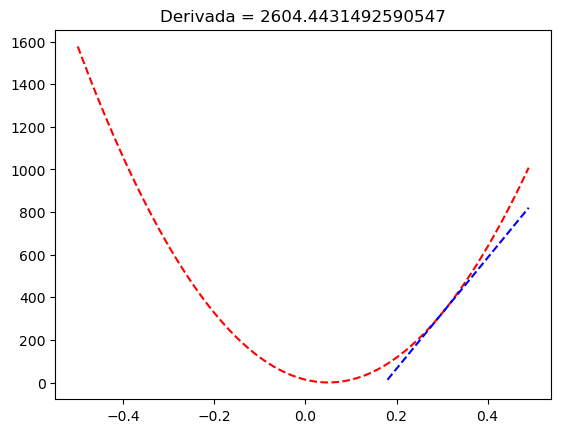

In [24]:
def plota_curva_de_erro_com_derivada_em_a(a, b = 0) :
    ## Plotando a curva completa de erro
    eixo_a, eixo_erro = erro_quadratico_variando_a()
    plt.plot(eixo_a, eixo_erro, 'r--', label='Erros')
    
    ## Computando o erro no ponto a
    oraculo = lambda x : a*x + b        
    erro_a = erro_quadratico_medio(oraculo)    
    
    ## Computando a derivada no ponto a
    m = derivada_erro_quadratico_no_ponto_a(a, b)

    ## Para desenhar a reta, usaremos o ponto a que já temos
    x0 = a
    y0 = erro_a
    
    ## Agora vamos criar a reta que tangencia o ponto a
    tangente = lambda x : m*(x-x0) + y0

    ## Agora vamos desenhar a reta
    eixo_tangente = []
    eixo_a_tangente = [] ## Vamos limitar o eixo_a ao quadrante positivo
    for val in eixo_a :
        tg = tangente(val)
        if (tg > 0) :
            eixo_tangente.append(tg)
            eixo_a_tangente.append(val)
    
    plt.plot(eixo_a_tangente, eixo_tangente, 'b--', label='Tangente')
    
    
    ## Vamos colocar o valor da derivada em a no título
    plt.title('Derivada = %s' % m)

plota_curva_de_erro_com_derivada_em_a(0.3)

No ponto $a = 0.3$, a derivada era positiva, então a tangente é ascendente, o que indica que a curva de erro estava em um movimento crescente com o aumento de $a$. Isso nos leva a concluir que diminuir o valor de $a$ nos aproxima do ponto mínimo da curva de erro, dado que queremos efetuar um movimento de descida.

Vamos agora olhar o ponto $a = -0.3$.

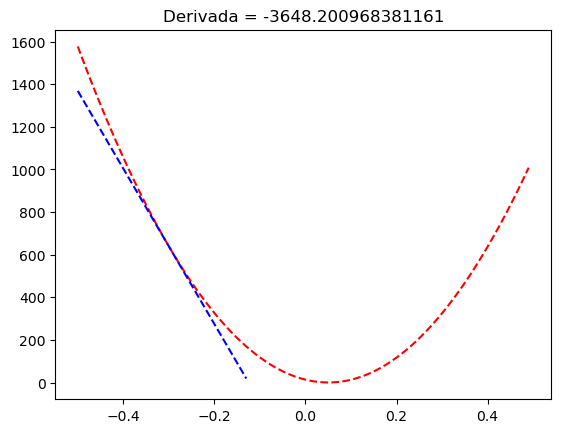

In [25]:
plota_curva_de_erro_com_derivada_em_a(-0.3)

No ponto $a = -0.3$, a derivada era negativa, então a tangente é descendente, o que indica que a curva de erro estava em um movimento decrescente com o aumento de $a$. Isso nos leva a concluir que aumentar o valor de $a$ nos aproxima do ponto mínimo da curva de erro, dado que queremos efetuar um movimento de descida.

Vamos plotar outras curvas para termos uma impressão melhor do que está acontecendo.

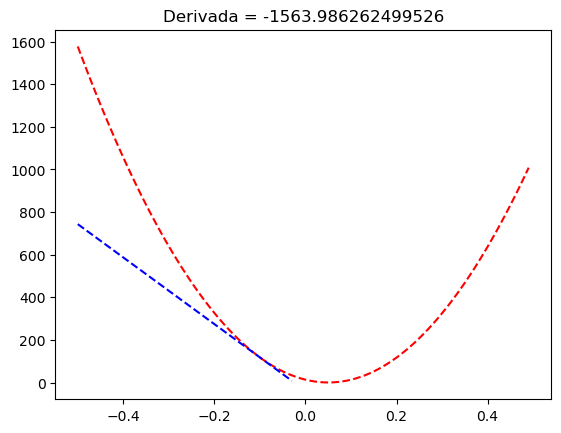

In [26]:
plota_curva_de_erro_com_derivada_em_a(-0.1)

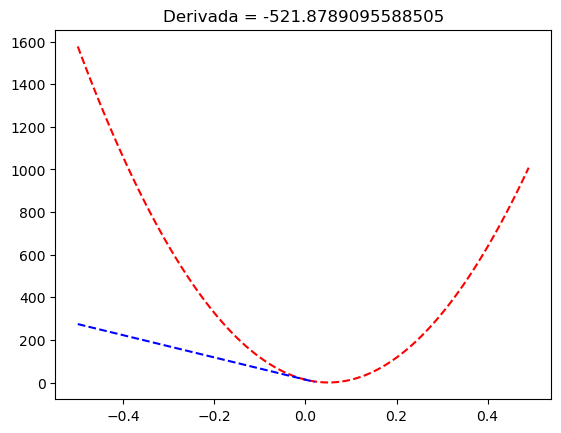

In [27]:
plota_curva_de_erro_com_derivada_em_a(0)

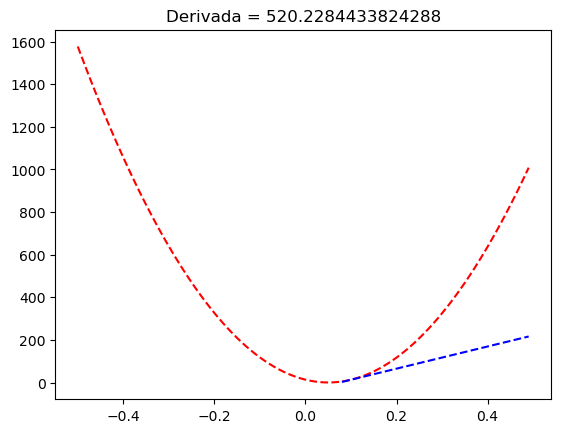

In [28]:
plota_curva_de_erro_com_derivada_em_a(0.1)

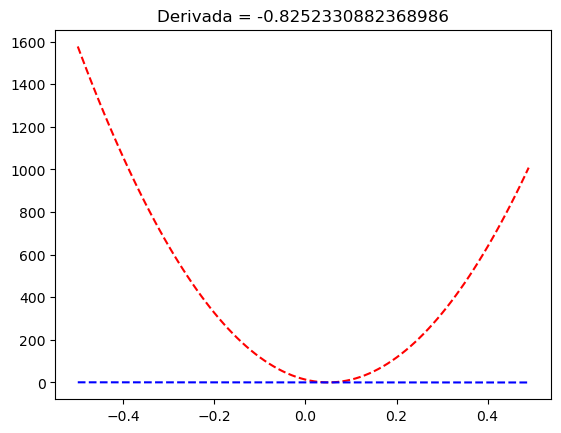

In [29]:
plota_curva_de_erro_com_derivada_em_a(0.05)


**Moral da história:**

1. Declividade negativa implica que o ponto mínimo está do lado direito do ponto atual.
2. Declividade positiva implica que o ponto mínimo está do lado esquerdo do ponto atual.
3. Declividade quase horizontal implica que estamos próximos do ponto mínimo.


# Algoritmo usando a derivada da curva de erro

Um algoritmo que podemos seguir consiste simplesmente em:

1.  Escolha um valor de $a$ ao acaso.
2.  Derive no ponto $a$ para sabermos a declividade.
3.  Compute um novo valor para $a$ baseando-se na declividade.


**Algoritmo:**

Um algoritmo que iterativamente aplica uma atualização de $a$ da seguinte forma pode eventualmente alcançar um ponto próximo do mínimo.

$a_{novo} = a_{antigo} - \textrm{derivada_erro_quadratico_no_ponto_a}(a_{antigo})$

**Ressalva:**

Os valores das derivadas podem ser muito altos, fazendo com que a escolha do $a_{novo}$ seja muito distante do original se não tomarmos cuidado.

Nesse caso, uma boa estratégia é escolhar um $\eta$ para multiplicar pelo valor da derivada e diminuir o tamanho do passo. Normalmente, o valor de $\eta = 0.01$ é um bom começo, mas deve ser variado para cada problema (um hiperparâmetro).

$a_{novo} = a_{antigo} - \eta \times \textrm{derivada_erro_quadratico_no_ponto_a}(a_{antigo})$

Vamos implementar este algoritmo na função chamada **descida_da_derivada**. Esse algoritmo recebe um valor de $a$ e devolve um novo valor mais próximo do erro mínimo. 

In [30]:
## ToDo: Implemente a função abaixo
def descida_da_derivada(a, b = 0, eta = 0.001) :
    m = derivada_erro_quadratico_no_ponto_a(a, b)
    
    ## ToDo: altere a linha abaixo para que entregue um novo a    
    return a

Vamos agora tentar descer a derivada (descer usando o caminho indicado pela derivada). 

Além de plotarmos a curva de erro, plotaremos a curva sobre os dados originais para vermos a evolução da regressão linear sobre os dados do nosso geyser. Essa função já foi implementada em aulas anteriores e está sendo trazida na íntegra no bloco a seguir:

In [31]:
def plota_grafico(oraculo, with_error = False) :
    ## Plotando os pontos do banco de dados
    faithful.plot.scatter(x='waiting',
                      y='eruptions')
    
    ## Criando um eixo X para plotar a reta
    eixo_x = range(40,100,2)
    eixo_y = []
    
    ## Gerando a resposta do oráculo
    for x in eixo_x :
        eixo_y.append(oraculo(x))
        
    ## Plotando a reta    
    plt.plot(eixo_x, eixo_y, 'r--', label='Valores Obtidos')
    
    if (with_error) :
    
        ## Colocando barras verticais para evidenciar erros
        ## do oráculo
        pontos_y = faithful.eruptions.values
        pontos_x = faithful.waiting.values
        for i in range(len(pontos_x)) :
            predicted = oraculo(pontos_x[i])
            plt.plot(
                (pontos_x[i], pontos_x[i]),
                (predicted, pontos_y[i]),
                '-', c = "black"
            )

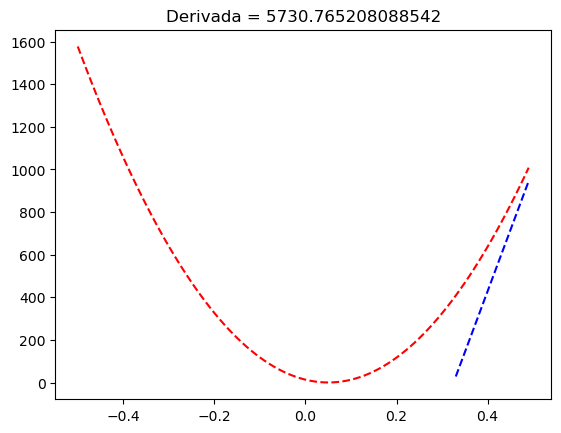

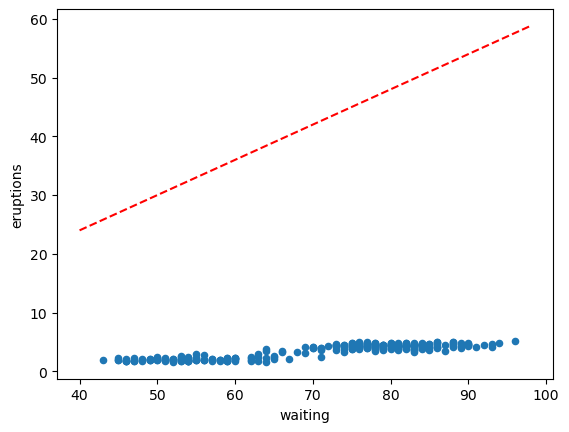

In [32]:
## Iniciando os valores
a = 0.6 ## Começaremos com um a arbitrário
b = 0.0 ## Fixando o b
eta = 0.0001 ## Escolhemos uma taxa de aprendizado bem baixa

plota_curva_de_erro_com_derivada_em_a(a)

plt.show()

plota_grafico(lambda x : a*x + b)

No bloco a seguir, o valor de $a$ será atualizado e a curva final, correspondente ao novo $a$, será mostrada na tela.

0.026923479191145794


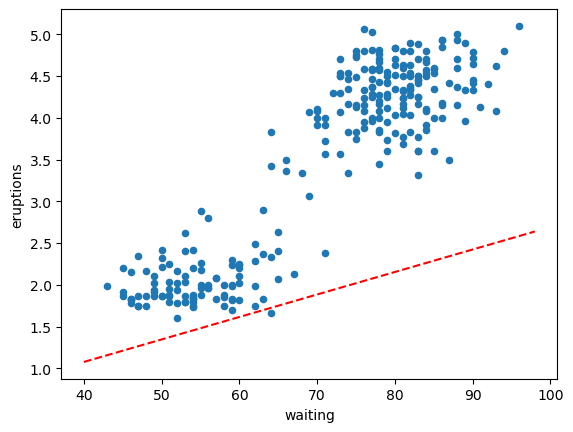

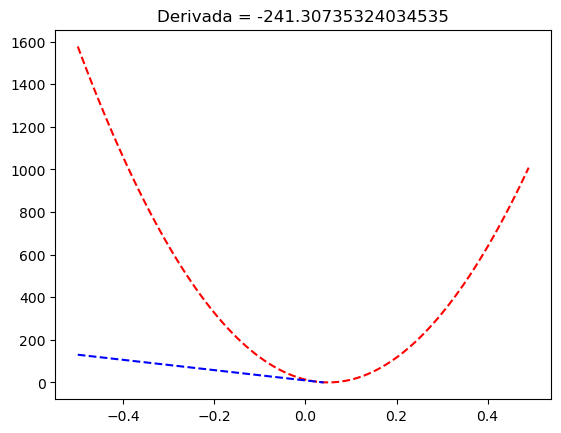

In [33]:
a = descida_da_derivada(a, b, eta)

print(a)

plota_grafico(lambda x : a*x + b)
plt.show()
plota_curva_de_erro_com_derivada_em_a(a)

Vamos descer a derivada mais uma vez.

0.05105421451518033


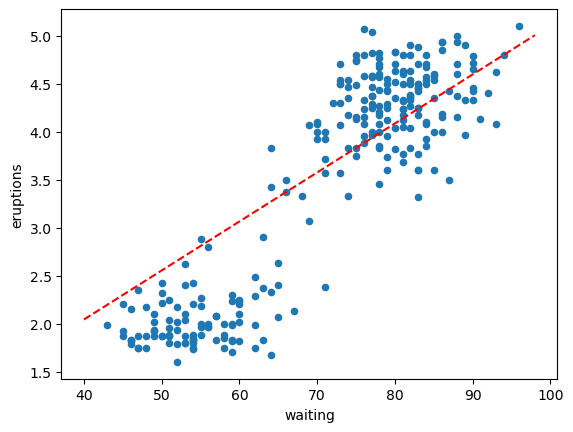

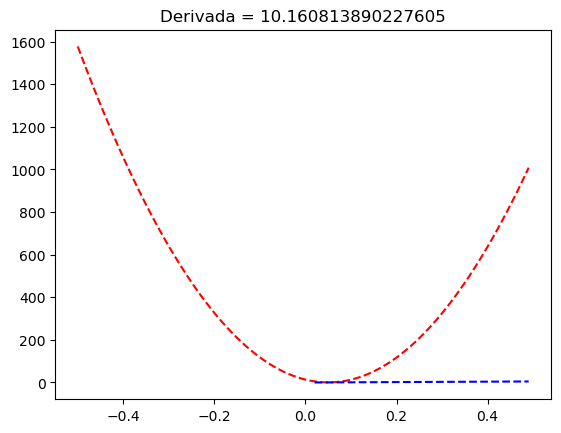

In [34]:
a = descida_da_derivada(a, b, eta)

print(a)

plota_grafico(lambda x : a*x + b)
plt.show()
plota_curva_de_erro_com_derivada_em_a(a)

No algoritmo acima, mencionamos apenas o ponto $a$. Entretanto, podemos seguir os mesmos passos para encontrar $b$, ou ainda, no caso de funções de ordem superior, podemos encontrar outros coeficientes. Por exemplo: $y = ax^2+bx+c$, podemos obter $a$, $b$ e $c$ com a mesma estratégia.

Vale ressaltar, no entanto, que devemos fazer a descida levando em conta todos os coeficientes ao mesmo tempo. Em outras palavras, dados os valores atuais de $a$, $b$ e $c$, devemos atualizar todos eles de uma vez com os novos valores baseados nas derivadas parciais do erro em função de $a$, $b$ e $c$, respectivamente. Essa descida em relação a todas as derivadas parciais é o que chamaremos de descida do gradiente.

**Derivada vs Gradiente**

A derivada é um conceito da matemática que mede a taxa de variação de uma função em relação a uma variável. Ela nos diz como a função está mudando em um ponto específico. Por exemplo, se tivermos uma função que descreve o movimento de um objeto em relação ao tempo, a derivada dessa função nos dirá a velocidade do objeto em um determinado instante.

Já o gradiente é um conceito usado principalmente em cálculo vetorial. Ele é uma generalização da derivada para funções com várias variáveis. Enquanto a derivada mede a taxa de variação em relação a uma única variável, o gradiente mede a taxa de variação em relação a múltiplas variáveis simultaneamente.

Pense no gradiente como uma seta que aponta na direção de maior crescimento de uma função em um ponto específico. O gradiente nos dá informações sobre a inclinação da função em todas as direções possíveis.

Em resumo, a derivada é usada para medir a taxa de variação de uma função em relação a uma única variável, enquanto o gradiente é usado para medir a taxa de variação em relação a múltiplas variáveis e nos dá informações sobre a inclinação da função em todas as direções.

Vamos criar uma descida do gradiente na função do primeiro grau. Para início de conversa, precisaremos derivar a função de erro em função de b também, dado que só temos derivado em função de $a$.

In [35]:
## ToDo: Implemente esta função
def derivada_erro_quadratico_no_ponto_b(a, b) :
    pass

**Derivada em função de b**

Como precisamos da derivada em função do coeficiente $b$, dado que agora consideramos que ele varia em conjunto com $a$, teremos que usar a regra da cadeia:

$$   \frac{\partial erro}{\partial b} =    \frac{\partial erro}{\partial f}     \frac{\partial f}{\partial b},$$ 

onde $\frac{\partial f}{\partial b} = 1$, dado que $f(x) = ax + b$, então derivar $f$ em função de $b$ retorna $1$, gerando:

$$\frac{\partial erro}{\partial b} =  \frac{2}{n}\sum_{(x_i,y_i)} (f(x_i) - y_i)$$

In [36]:
## ToDo: complete esta função
def derivada_erro_quadratico_no_ponto_b_diretamente(a, b) :
    y = faithful.eruptions.values
    x = faithful.waiting.values
    
    derivada = 0
    for i in range(len(x)) :
        x_i = x[i]
        y_i = y[i]
        f_x_i = a*x_i + b
        
        ## ToDo: descomente e complete a linha abaixo
        ## derivada += ...
    
    return derivada   

In [37]:
derivada_erro_quadratico_no_ponto_b(0.4, 3)

55.74209086489645

In [38]:
derivada_erro_quadratico_no_ponto_b_diretamente(0.4, 3)

55.742080882352916

Agora vamos criar um algoritmo de descida do gradiente para funções do primeiro grau.

In [39]:
def descida_do_gradiente_primeiro_grau(a, b, eta = 0.001) :
    ma = derivada_erro_quadratico_no_ponto_a(a, b)
    mb = derivada_erro_quadratico_no_ponto_b(a, b)

    return a - ma*eta, b - mb*eta

Agora podemos efetuar a descida do gradiente.

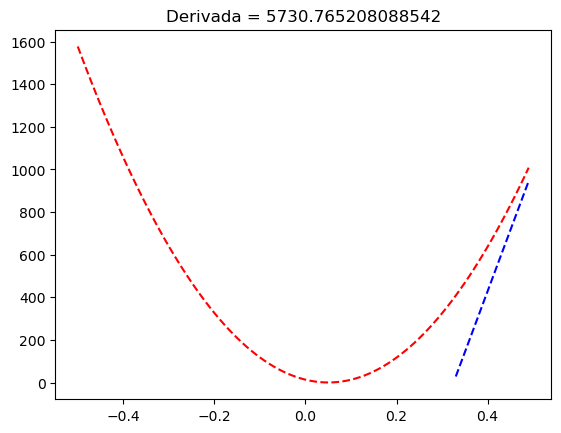

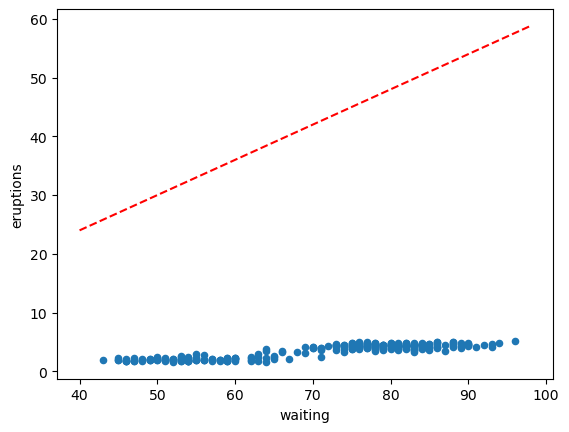

In [40]:
a = 0.6
b = 0
eta = 0.0001

plota_curva_de_erro_com_derivada_em_a(a)

plt.show()

plota_grafico(lambda x : a*x + b)

0.026923479191145794 -0.007810091435658251


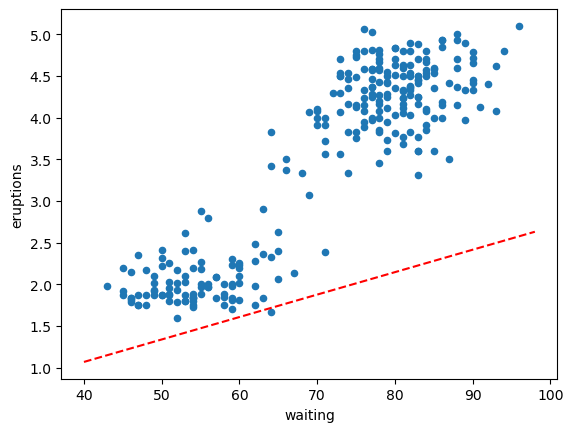

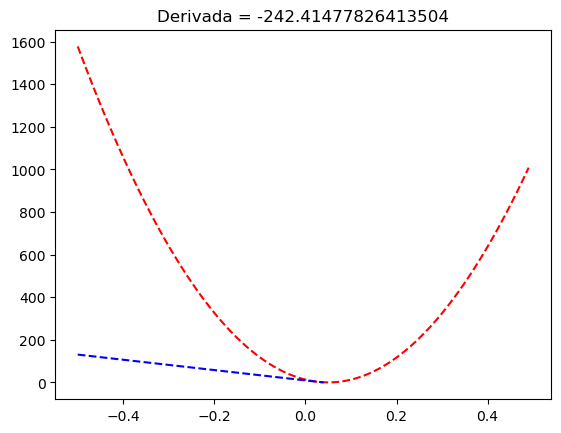

In [41]:
a, b = descida_do_gradiente_primeiro_grau(a, b, eta)

print(a, b)

plota_grafico(lambda x : a*x + b)
plt.show()
plota_curva_de_erro_com_derivada_em_a(a, b)

0.0511649570175593 -0.007492732897329546


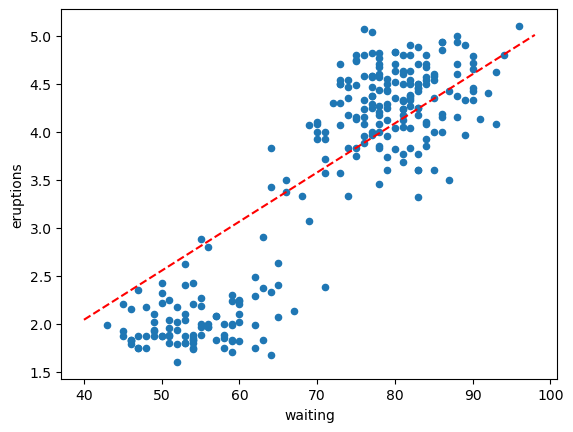

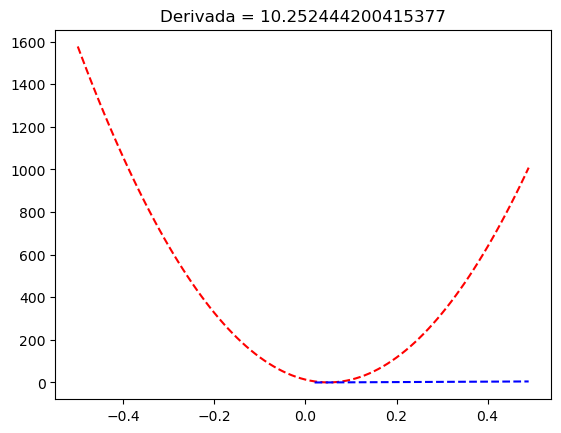

In [42]:
a, b = descida_do_gradiente_primeiro_grau(a, b, eta)

print(a, b)

plota_grafico(lambda x : a*x + b)
plt.show()
plota_curva_de_erro_com_derivada_em_a(a, b)

0.05013971259751776 -0.007519167726577902


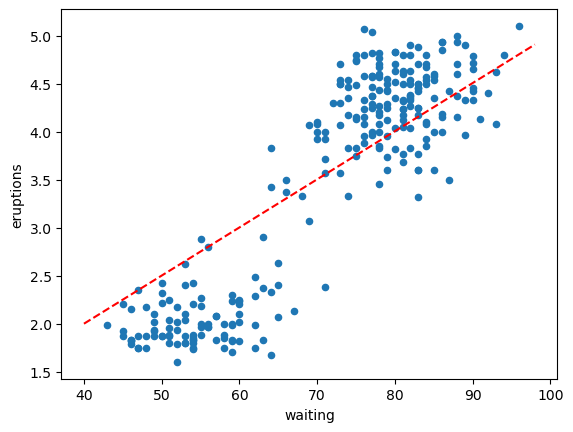

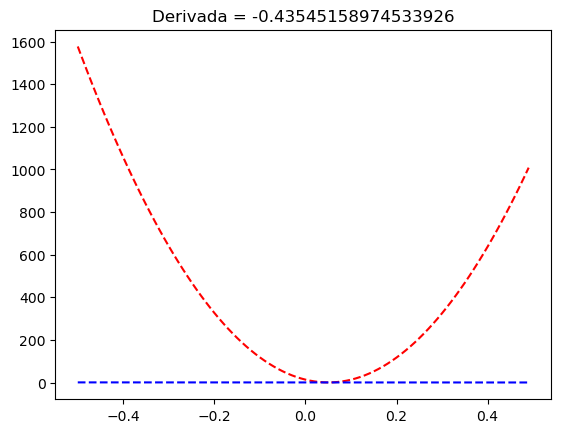

In [43]:
a, b = descida_do_gradiente_primeiro_grau(a, b, eta)

print(a, b)

plota_grafico(lambda x : a*x + b)
plt.show()
plota_curva_de_erro_com_derivada_em_a(a, b)

## Função do Segundo Grau

Vamos agora realizar um experimento nos mesmos dados que usamos anteriormente. O objetivo será plotar uma curva do segundo grau, em outras palavras, uma curva do tipo $y = ax^2 + bx + c$. 

A dificuldade agora é que temos mais parâmetros livres que precisamos descobrir: $a$, $b$ e $c$. Em outras palavras, mais derivadas a serem computadas.

In [44]:
def descida_do_gradiente_segundo_grau(a, b, c, eta = 0.001) :
    oraculo = lambda x : a*x**2 + b*x + c
    
    epsilon = 0.00001
        
    oraculo_delta_a = lambda x : (a + epsilon)*x**2 + b*x + c
    oraculo_delta_b = lambda x : a*x**2 + (b + epsilon)*x + c
    oraculo_delta_c = lambda x : a*x**2 + b*x + c + epsilon

    erro_oraculo = erro_quadratico_medio(oraculo)
    
    erro_delta_a   = erro_quadratico_medio(oraculo_delta_a)
    erro_delta_b   = erro_quadratico_medio(oraculo_delta_b)
    erro_delta_c   = erro_quadratico_medio(oraculo_delta_c)
        
    ma = (erro_delta_a - erro_oraculo)/epsilon
    mb = (erro_delta_b - erro_oraculo)/epsilon
    mc = (erro_delta_c - erro_oraculo)/epsilon
    
    return a - ma*eta, b - mb*eta, c - mc*eta

O próximo passo é econtrar os valores que minimizam

In [45]:
a = 0
b = 0
c = 0
eta = 0.00000001 ## Observe que decrescemos o valor de eta

In [46]:
for epochs in range(10) :
    a,b,c = descida_do_gradiente_segundo_grau(a, b, c, eta)
print(a, b, c)


0.0006505701562449527 9.28437014350136e-06 1.302395627764685e-07


Agora plote a curva que você encontrou em um gráfico. Em outras palavras, crie o quinto oráculo com os valores encontrados por você.

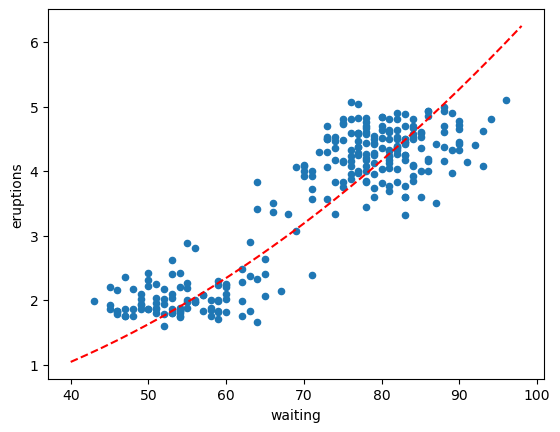

In [47]:
plota_grafico(lambda x : a*x**2 + b*x+c)

## Considerações sobre a taxa de aprendizado

No último exemplo, você deve ter notado que a taxa de aprendizado foi decrescida de $10^{-4}$ para $10^{-8}$ do penúltimo para o último exemplo. Isso foi feito porque os valores na entrada aumentaram muito dado que elevamos ao quadrado o valor de $x$, o que gerou erros iniciais muito maiores, além de um derivada também muito grande. Volte ao exemplo anterior e note que se tivéssemos mantido a taxa de aprendizado $10^{-4}$ encontraríamos um aumento no erro a cada iteração.

O que ocorre realmente é que o valor da taxa de aprendizado pode atrapalhar e muito o aprendizado se não for bem ajustado. Duas coisas devem ser levadas em conta:



**Se o valor for muito baixo, o aprendizado demorará muito para ocorrer.**

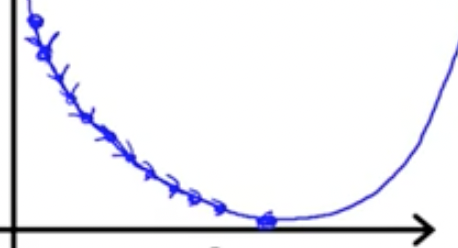

**Se o valor for muito alto, passaremos a uma longa distância do ponto mínimo**

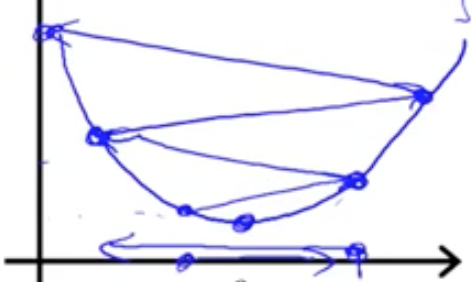

A taxa deve ser ajustada para cada problema, não havendo realmente uma regra de como tem que ser configurada. Entretanto, uma sugestão ajuda: **mantenha o valor de todas as entradas entre 0 e 1$, o que fará com que a escolha da taxa de aprendizado seja menos caótica, além de trazer outras vantagens para diversos algoritmos muito sensíveis aos valores da entrada**. 

Note que isso não foi feito anteriormente, no exemplo deste notebook, mas será algo que trabalharemos em aulas futuras.

## Recaptulando

Na aula anterior, aprendemos que a curva de erro possui um padrão que pode ser explorado quando queremos encontrar os valores dos parâmetros que minimizam o erro. Na aula de hoje, expandimos os nossos conhecimeos para incluir:

1. O gradiente em um dado ponto $x_i$ nos permite concluir para que lado fica o ponto mínimo em relação a $x_i$.

2. O algoritmo da descida do gradiente, em cada iteração $i$, gera um valor $x_{i+1}$ a partir de $x_i$ usando a direção indicada pelo gradiente.

3. A taxa de aprendizado é um hiperparâmetro que controla o quão longe $x_{i+1}$ estará de $x_{i}$.